In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("M5_Data.csv")

# Task 5-9
In this part, we create a function that accepts as input the actual and predicted classifications for any binary classification data and then calculates and returns the metrics for the predictions without utilizing any pre-built Python metric calculation functions. Using the crosstab function to calculate the TP,FP, TN and FN, we can easily get the accuracy, precision, sensitivity, specificity, and F1 Score of the prediction result.

In [2]:
def task5_9(actual, predicted):
    """
    Calculate accuracy metric for binary classification.
    
    Args:
    actual_labels: List of actual labels.
    predicted_labels: List of predicted labels.
    
    Returns:
    tuple: (accuracy, precision, sensitivity, specificity, f1_score).
    """
    confusion_matrix = pd.crosstab(actual, predicted)
    TP = confusion_matrix.loc[1, 1]
    FP = confusion_matrix.loc[0, 1]
    TN = confusion_matrix.loc[0, 0]
    FN = confusion_matrix.loc[1, 0]

    accuracy = (TP + TN) / (TP + FP + TN + FN) if (TP + FP + TN + FN) > 0 else 0
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) > 0 else 0
    return accuracy, precision, sensitivity, specificity, f1_score


In [3]:
accuracy, precision, sensitivity, specificity, f1_score = task5_9(df['class'], df['scored.class'])
print("Accuracy:    ", accuracy)
print("Precision:   ", precision)
print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)
print("F1 Score:    ", f1_score)

Accuracy:     0.8066298342541437
Precision:    0.84375
Sensitivity:  0.47368421052631576
Specificity:  0.9596774193548387
F1 Score:     0.6067415730337079


# Task 10
In this part, we will first sort the predicted probabilities and corresponding actual labels from high to low and use a loop to calculate the accumulated tpr and fpr to plot the ROC curve. Calculate the area under the curve and we can get the final AUC value.

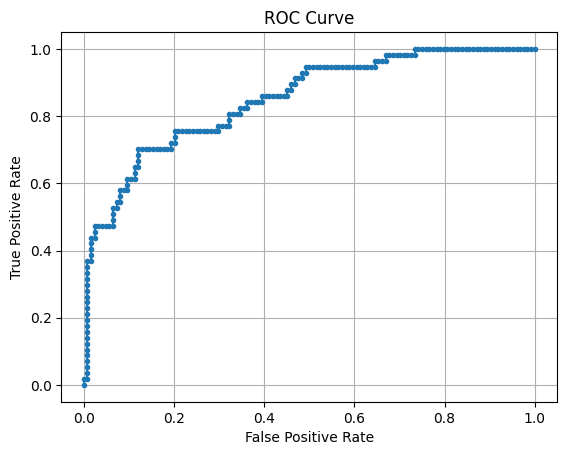

AUC: 0.8503112620260332


In [26]:


def ROC_AUC(actual, predicted_probabilities):
    """
    Plot ROC curve and calculate AUC.

    Args:
    actual (list): List of actual labels.
    predicted_probabilities (list): List of predicted probabilities for the positive class.

    Returns:
    float: AUC value.
    """
    # Sort the predicted probabilities and corresponding actual labels
    sorted_indices = sorted(range(len(predicted_probabilities)), key=lambda i: predicted_probabilities[i], reverse=True)
    actual_sorted = [actual[i] for i in sorted_indices]
    predicted_probabilities_sorted = [predicted_probabilities[i] for i in sorted_indices]

    # Initialize variables
    tpr_list, fpr_list = [0],[0]
    auc=0
    tp = fp = 0
    total_positive = sum(actual)
    total_negative = len(actual) - sum(actual)

    # Calculate TPR and FPR
    for i in range(len(actual)):
        if actual_sorted[i] == 1:
            tp += 1
        else:
            fp += 1

        tpr = tp / total_positive
        fpr = fp / total_negative
        tpr_list.append(tpr)
        fpr_list.append(fpr)

    # Calculate area under the curve which is the final AUC value
    for i in range(len(fpr_list) - 1):
        auc += (fpr_list[i + 1] - fpr_list[i]) * (tpr_list[i + 1] + tpr_list[i]) / 2

    # Plot ROC curve
    plt.plot(fpr_list, tpr_list, marker='.', linestyle='-')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.grid(True)
    plt.show()

    return auc
auc = ROC_AUC(df['class'], df['scored.probability'])
print("AUC:", auc)

From the ROC Curve results, we can infer that the relationship between sensitivity and specificity is performing well. The AUC calculation shows a approximate 0.85. A higher AUC value indicates a better performance of the model at distinguishing the positive and negative classes, thus the model performs well.